In [ ]:
# !pip install -U scikit-learn

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error, r2_score
import plotly.express as px
import math
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("Data3.csv")
df.head()

,x,z
0,0.1,1.159563
1,0.2,1.002381
2,0.3,0.935920
3,0.4,0.016261
4,0.5,1.172652


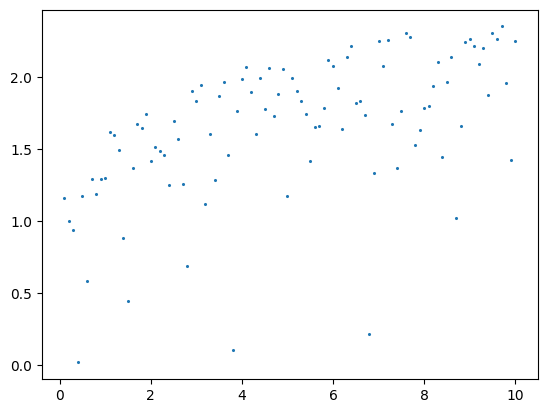

In [ ]:
x_list = [float(i) for i in df['x']]
y_list = [float(i) for i in df['z']]

plt.scatter(x_list, y_list, s=1.5)
plt.show()

In [ ]:
# Now it is the turn of the function for slope and intercept
def minimize(x_list, y_list):
  '''
  Returns the value of slope(m) and intercept(c)

  Parameter x_list: List of values of inputs
  Precondition: This list must contain int or float values

  Parameter y_list: List of valus of output of the experiment
  Precondition: This list must contain int or float values

  Parameter n: It is the number of experiment
  Precondition: It must be a positive integer
  '''
  assert type(x_list) == list,'Please give inputs in a list'
  assert type(y_list) == list,'Please provide the outputs in a list'

  # Accumulators...
  n = len(x_list)
  xy = 0
  x = 0
  y = 0
  x_square = 0

  for i in range(n):
    y += y_list[i]
    x += x_list[i]
    x_square += x_list[i] ** 2
    xy += x_list[i] * y_list[i]
  xyBar = xy / n
  xBar = x / n
  yBar = y / n
  xSquareBar = x_square / n
  xBarSquare = xBar ** 2
  # Calculating values of m and c using above terms in above mentoned formula for m and c.
  m_new = (xyBar - xBar * yBar) / (xSquareBar - xBarSquare)
  c_new = yBar - m_new * xBar

  return (m_new, c_new)

In [ ]:
observed_y = y_list

y_analytical = []
new_values = minimize(x_list, observed_y)

print(new_values[0], new_values[1])

for i in range(len(df)):
    y_analytical.append(new_values[0]*x_list[i] + new_values[1])

0.09419021414817913 1.1770620783119958


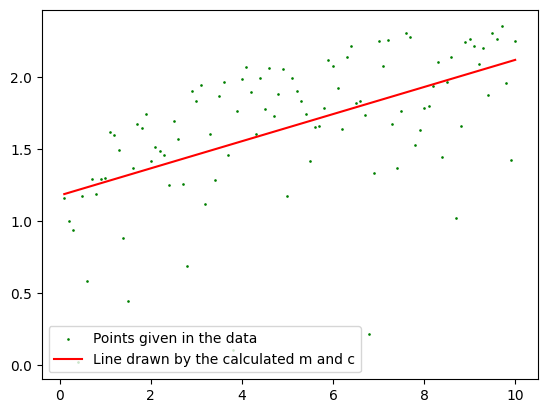

In [ ]:
# Let's play with the graph
plt.scatter(x_list, y_list, label = 'Points given in the data', color='green', s = 0.8)
plt.plot(x_list, y_analytical, label = 'Line drawn by the calculated m and c', color = 'red')
plt.legend()
plt.show()

In [ ]:
# Now for calculating the error functions

x_array = np.array(x_list).reshape(-1, 1)
y_array = np.array(y_list).reshape(-1, 1)

y_pred_array_myCode = np.array(y_analytical).reshape(-1, 1)

In [ ]:
mae = mean_absolute_error(y_true=y_array,y_pred=y_pred_array_myCode)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_array,y_pred=y_pred_array_myCode) #default=True
rmse = mean_squared_error(y_true=y_array,y_pred=y_pred_array_myCode,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.29467793301310363
MSE: 0.16173044143088558
RMSE: 0.4021572347116058


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Now let's verify the above written code using inbuilt library SKlearn

regr = LinearRegression()

x_array = np.array(x_list).reshape(-1, 1)
y_array = np.array(y_list).reshape(-1, 1)

regr.fit(x_array,y_array)
print("Slope: ", regr.coef_)
print("Intercept: ", regr.intercept_)

Slope:  [[0.09419021]]
Intercept:  [1.17706208]


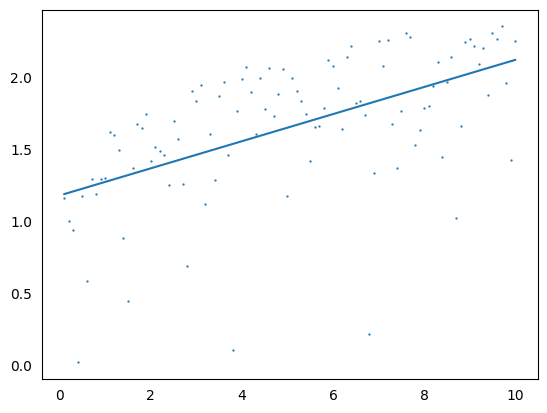

In [ ]:
y_pred_list = list(y_pred_array_myCode.reshape(1,-1)[0])

plt.scatter(x_list, y_list,s=0.4)
plt.plot(x_list, y_pred_list)
plt.tick_params(left = False, bottom = False)
plt.show()

In [ ]:
mae = mean_absolute_error(y_true=y_array,y_pred=y_pred_array_myCode)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_array,y_pred=y_pred_array_myCode) #default=True
rmse = mean_squared_error(y_true=y_array,y_pred=y_pred_array_myCode,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.29467793301310363
MSE: 0.16173044143088558
RMSE: 0.4021572347116058


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
